<a href="https://colab.research.google.com/github/Satabdi08/Project/blob/main/Project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation - Using k-Means**

Use K-means clustering and also visualize the gender and age distributions. Then analyze their annual incomes and spending scores.

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Data Collection & Analysis

In [ ]:
#reading data using pandas to a dataframe and printing its head values
customer = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data contains 5 columns i.e. CustomerID, Gender, Age, Annual Income and Spending Score in the dataframe 'customer'.

In [ ]:
# Checking the number of rows and columns
customer.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for null values
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## **Visualizing various Distributions**

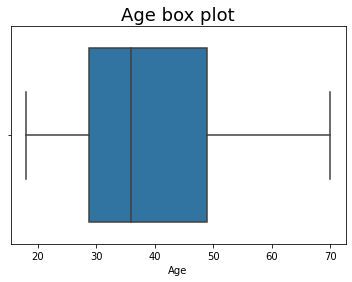

In [ ]:
# box plot for 'Age'
sns.boxplot(customer['Age'])
plt.title('Age box plot', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.show()







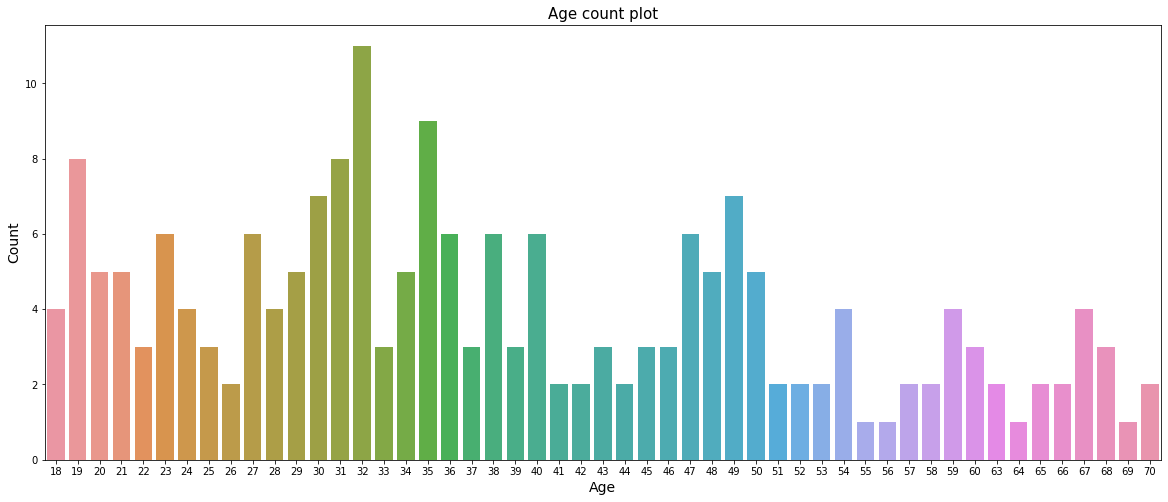

In [ ]:
# count plot for 'Age'
plt.figure(figsize=(20,8))
sns.countplot(customer['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()


here,we can clearly point out that customers of age 32 are most value count.

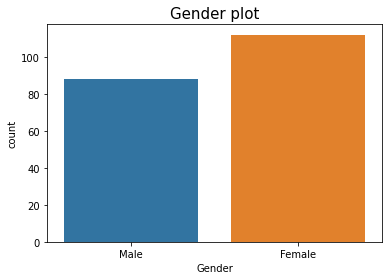

In [ ]:
# bar plot for 'Gender'
sns.countplot(x='Gender', data=customer)
plt.title('Gender plot', fontsize = 15)
plt.show()

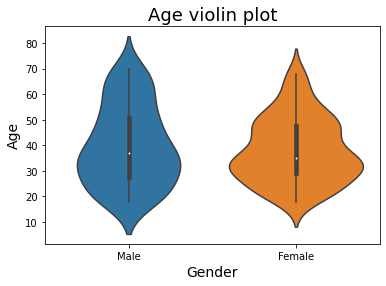

In [ ]:
# violin plot for 'Age' following 'gender'
sns.violinplot(y = 'Age' , x = 'Gender' , data = customer)
plt.title('Age violin plot', fontsize = 18)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.show()

Higher number of female customer who belongs to age group of 30 years.

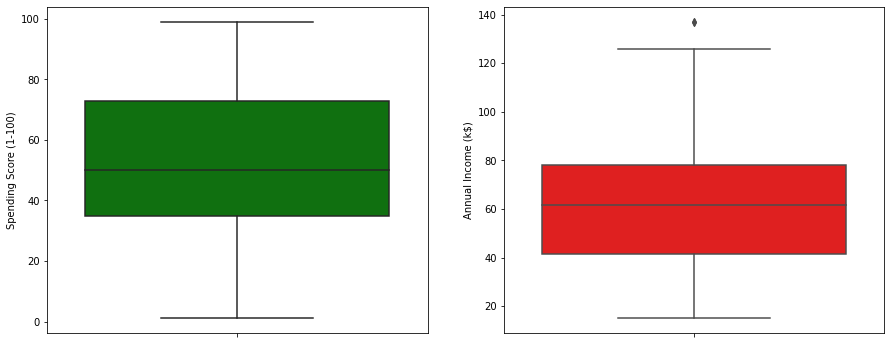

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customer["Spending Score (1-100)"], color="green")
plt.subplot(1,2,2)
sns.boxplot(y=customer["Annual Income (k$)"],color="red")
plt.show()

A box plot of spending score and annual income to better visualize the distribution range.

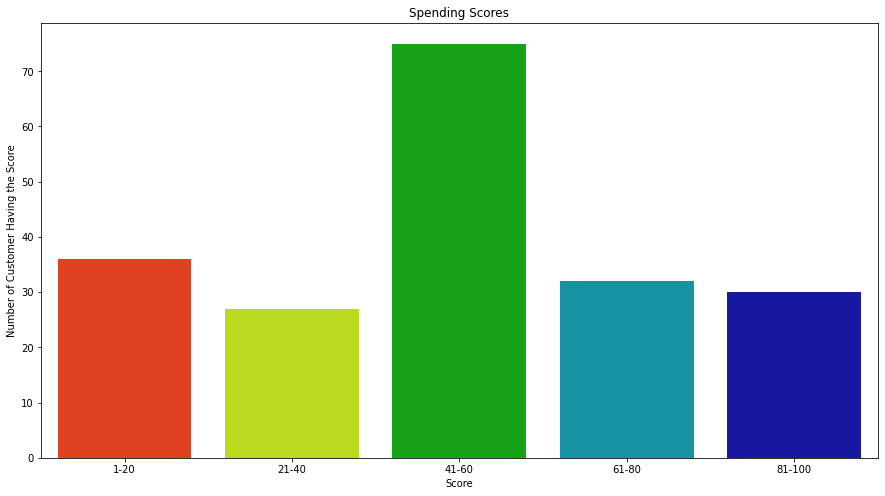

In [ ]:
ss1_20 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 1) & (customer["Spending Score (1-100)"] <= 20)]
ss21_40 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 21) & (customer["Spending Score (1-100)"] <= 40)]
ss41_60 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 41) & (customer["Spending Score (1-100)"] <= 60)]
ss61_80 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 61) & (customer["Spending Score (1-100)"] <= 80)]
ss81_100 = customer["Spending Score (1-100)"][(customer["Spending Score (1-100)"] >= 81) & (customer["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,8))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

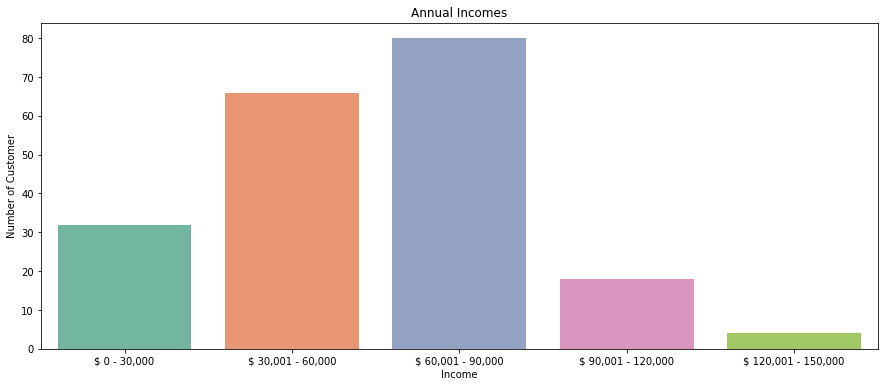

In [ ]:

ai0_30 = customer["Annual Income (k$)"][(customer["Annual Income (k$)"] >= 0) & (customer["Annual Income (k$)"] <= 30)]
ai31_60 = customer["Annual Income (k$)"][(customer["Annual Income (k$)"] >= 31) & (customer["Annual Income (k$)"] <= 60)]
ai61_90 = customer["Annual Income (k$)"][(customer["Annual Income (k$)"] >= 61) & (customer["Annual Income (k$)"] <= 90)]
ai91_120 = customer["Annual Income (k$)"][(customer["Annual Income (k$)"] >= 91) & (customer["Annual Income (k$)"] <= 120)]
ai121_150 = customer["Annual Income (k$)"][(customer["Annual Income (k$)"] >= 121) & (customer["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Choosing number of clusters.



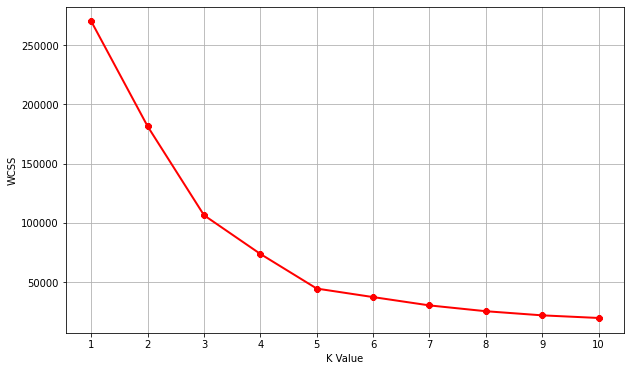

In [ ]:
#WCSS refers to Within Clusters Sum of Squares
#finding wcss value for different number of clusters
Income_Spend=customer[['Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(Income_Spend)

  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()  

5 is the optimum number of clusters

Clusters considering annual income and spending score.

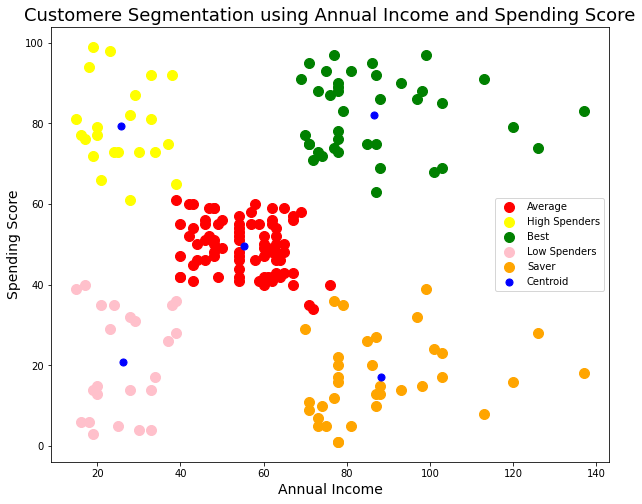

In [ ]:
Income_Spend = customer[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(10,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'red', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'High Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'green', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'pink', label = 'Low Spenders')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 18)
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.show()

Through the above plot,we can consider that there are five clusters based on customer's Annual Income and Spending Score.They are categorized accordingly.

### **Project Completed.**
## Done by:Satabdi Sobhan Pradhan
Email:satabdipradhan.980@gmail.com